In [1]:
# We import all our dependencies.
from n2v.models import N2VConfig, N2V
import numpy as np
from csbdeep.utils import plot_history
from n2v.utils.n2v_utils import manipulate_val_data
from n2v.internals.N2V_DataGenerator import N2V_DataGenerator
from matplotlib import pyplot as plt
import urllib
import os

shape without alpha:     (1, 681, 617, 1)


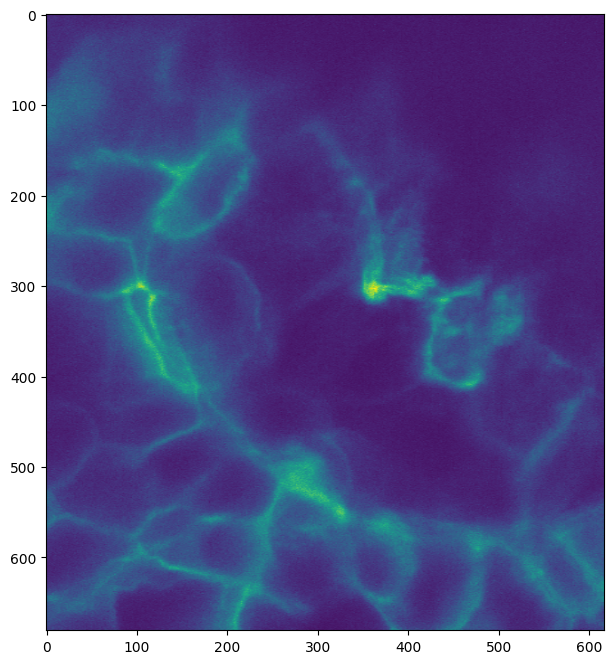

In [11]:
datagen = N2V_DataGenerator()
imgs = datagen.load_imgs_from_directory(directory="./../domes/2d_black_line_test/", filter='*-train.tif', dims='YX')
#imgs[0] = imgs[0][...,:3]
print('shape without alpha:    ',imgs[0].shape)
plt.figure(figsize=(16,8))
plt.imshow(imgs[0][0,:,:,0])
plt.show()

Generated patches: (3192, 32, 32, 1)


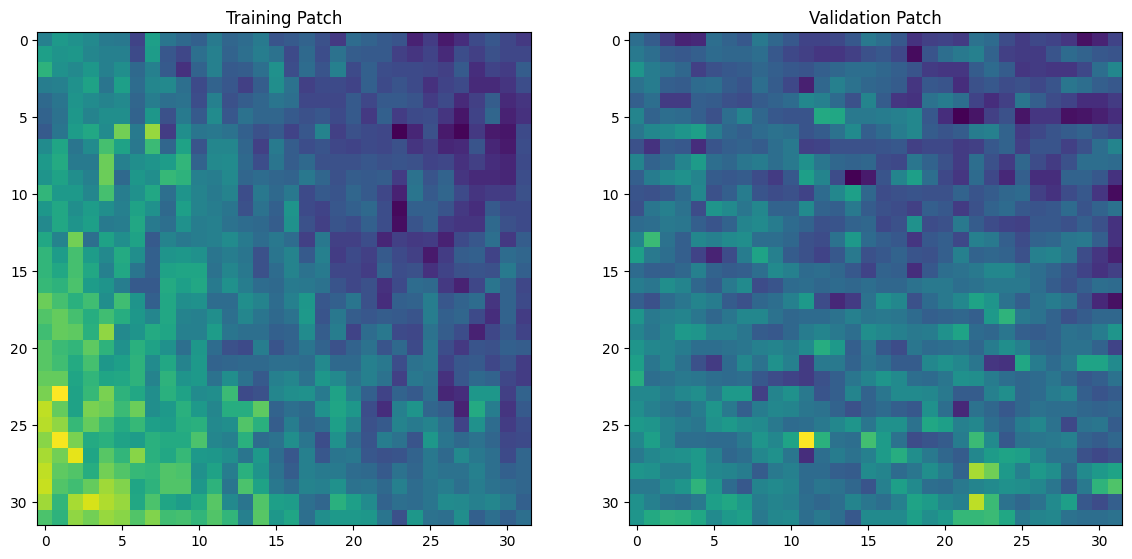

In [22]:
patch_shape=(32,32)
patches = datagen.generate_patches_from_list(imgs, shape=patch_shape)
X = patches[:2800]
X_val = patches[1800:]
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(X[0,...])
plt.title('Training Patch');
plt.subplot(1,2,2)
plt.imshow(X_val[0,...])
plt.title('Validation Patch');

In [23]:
config = N2VConfig(X, unet_kern_size=3, 
                   unet_n_first=64, unet_n_depth=3, train_steps_per_epoch=int(X.shape[0]/128), train_epochs=25, train_loss='mse', 
                   batch_norm=True, train_batch_size=128, n2v_perc_pix=0.198, n2v_patch_shape=(32, 32), 
                   n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=5, single_net_per_channel=False)

# Let's look at the parameters stored in the config-object.
vars(config)

{'means': ['190.10388'],
 'stds': ['62.43993'],
 'n_dim': 2,
 'axes': 'YXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'unet_residual': False,
 'unet_n_depth': 3,
 'unet_kern_size': 3,
 'unet_n_first': 64,
 'unet_last_activation': 'linear',
 'unet_input_shape': (None, None, 1),
 'train_loss': 'mse',
 'train_epochs': 25,
 'train_steps_per_epoch': 21,
 'train_learning_rate': 0.0004,
 'train_batch_size': 128,
 'train_tensorboard': True,
 'train_checkpoint': 'weights_best.h5',
 'train_reduce_lr': {'factor': 0.5, 'patience': 10},
 'batch_norm': True,
 'n2v_perc_pix': 0.198,
 'n2v_patch_shape': (32, 32),
 'n2v_manipulator': 'uniform_withCP',
 'n2v_neighborhood_radius': 5,
 'single_net_per_channel': False,
 'blurpool': False,
 'skip_skipone': False,
 'structN2Vmask': None,
 'probabilistic': False}

In [29]:
# a name used to identify the model --> change this to something sensible!
model_name = 'n2v_test_black_line_2d'
# the base directory in which our model will live
basedir = 'models_test'
# We are now creating our network model.
model = N2V(config, model_name, basedir=basedir)

In [25]:
history = model.train(X, X_val)

2 blind-spots will be generated per training patch of size (32, 32).


Preparing validation data: 100%|██████████| 1392/1392 [00:00<00:00, 6813.45it/s]


Epoch 1/25
21/21 [==============================] - 67s 3s/step - loss: 0.3158 - n2v_mse: 0.3158 - n2v_abs: 0.3654 - val_loss: 0.6344 - val_n2v_mse: 0.6349 - val_n2v_abs: 0.6384 - lr: 4.0000e-04
Epoch 2/25
21/21 [==============================] - 59s 3s/step - loss: 0.0625 - n2v_mse: 0.0625 - n2v_abs: 0.1784 - val_loss: 0.6032 - val_n2v_mse: 0.6038 - val_n2v_abs: 0.6259 - lr: 4.0000e-04
Epoch 3/25
21/21 [==============================] - 59s 3s/step - loss: 0.0437 - n2v_mse: 0.0437 - n2v_abs: 0.1498 - val_loss: 0.5952 - val_n2v_mse: 0.5958 - val_n2v_abs: 0.6132 - lr: 4.0000e-04
Epoch 4/25
21/21 [==============================] - 59s 3s/step - loss: 0.0482 - n2v_mse: 0.0482 - n2v_abs: 0.1616 - val_loss: 0.5711 - val_n2v_mse: 0.5717 - val_n2v_abs: 0.5963 - lr: 4.0000e-04
Epoch 5/25
21/21 [==============================] - 59s 3s/step - loss: 0.0419 - n2v_mse: 0.0419 - n2v_abs: 0.1451 - val_loss: 0.5304 - val_n2v_mse: 0.5310 - val_n2v_abs: 0.5813 - lr: 4.0000e-04
Epoch 6/25
21/21 [=======

['loss', 'lr', 'n2v_abs', 'n2v_mse', 'val_loss', 'val_n2v_abs', 'val_n2v_mse']


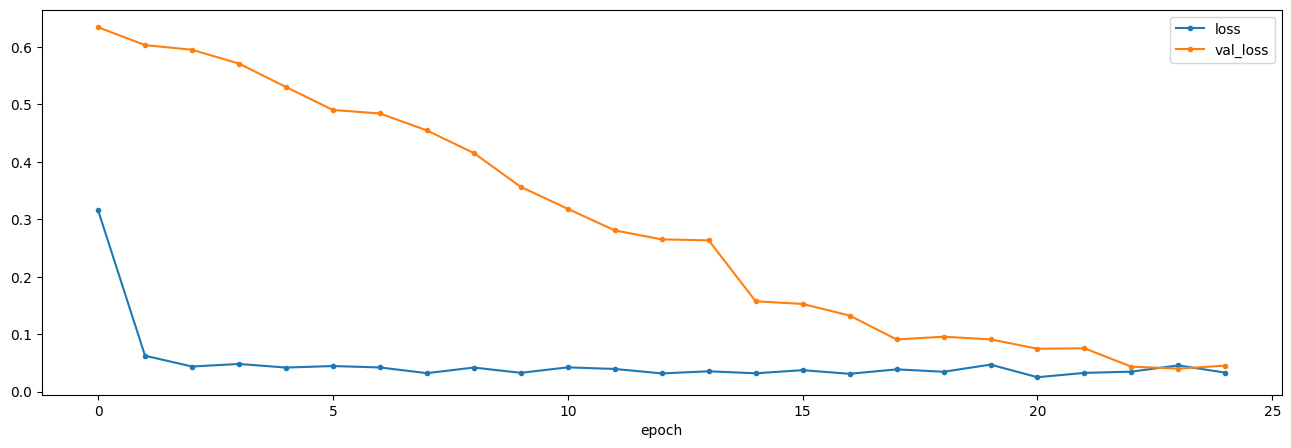

In [26]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss']);

In [27]:
model.export_TF(name='blacklinetest', 
                description='2D image to test black line consequences.', 
                authors=["domedeum"],
                test_img=X_val[0], axes='YXC',
                patch_shape=patch_shape)

1/1 [==============================] - 0s 484ms/step
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.


d:\Python_vscode\venv_tf\Lib\site-packages\csbdeep\utils\tf.py:177: UserWarning: 
***IMPORTANT NOTE***

You are using 'tensorflow' 2.x, hence it is likely that the exported model *will not work*
in associated ImageJ/Fiji plugins (e.g. CSBDeep and StarDist).

If you indeed have problems loading the exported model in Fiji, the current workaround is
to load the trained model in a Python environment with installed 'tensorflow' 1.x and then
export it again. If you need help with this, please read:

https://gist.github.com/uschmidt83/4b747862fe307044c722d6d1009f6183

  warnings.warn(\


INFO:tensorflow:SavedModel written to: C:\Users\SPIM\AppData\Local\Temp\tmplt5gaf33\model\saved_model.pb

Model exported in BioImage ModelZoo format:
D:\Python_vscode\n2v_2d_black_line\models_test\n2v_test_black_line_2d\export.bioimage.io.zip
